### Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R/Python and achieve the following goals:
- Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized
- Present the financial benefit of this project to the marketing team

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import math

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score , classification_report 
from sklearn.preprocessing  import LabelEncoder 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier 
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression , LogisticRegressionCV

In [67]:
bank = pd.read_csv("D:/UpGrad/bank-additional-full.csv", sep = ';')

In [68]:
bank.shape

(41188, 21)

In [69]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [70]:
bank.isnull().sum() / len(bank) * 100

# So there are no missing values in the data

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [71]:
# Lets rename the y column to give a proper understanding

bank = bank.rename(columns={'y': 'Product_Bought'})

In [72]:
bank['Product_Bought'].value_counts() / len(bank) * 100

# So right now we have 11 % people who actually brought the product from the campaign conducted by the portuguese bank

no     88.734583
yes    11.265417
Name: Product_Bought, dtype: float64

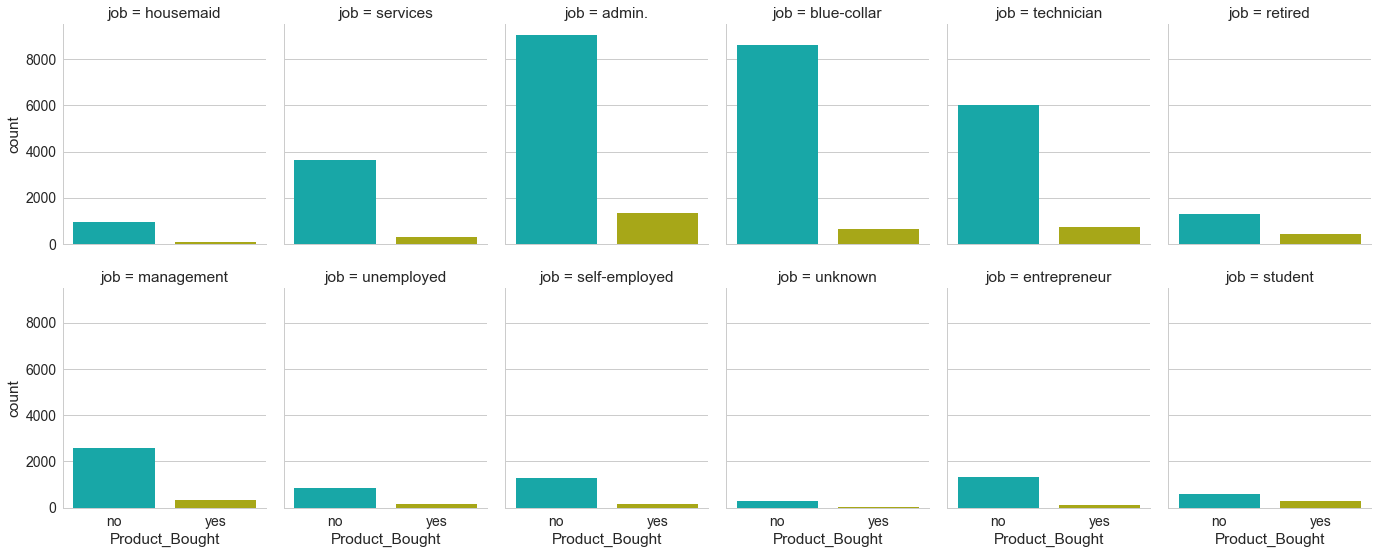

Percentage of conversion when a customer has a job of Admin: 
no     87.027442
yes    12.972558
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion when a customer has a job of Blue-Collar: 
no     93.105684
yes     6.894316
Name: Product_Bought, dtype: float64
------
------


In [73]:
# lets do some visualisation 

# Lets check the various job roles that have bought our product

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col="job",col_wrap=6,
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C", "y"])

plt.show()

print('Percentage of conversion when a customer has a job of Admin: ')
print(bank[bank['job']=='admin.']['Product_Bought'].value_counts() / len(bank[bank['job']=='admin.'])*100)
print('------')
print('------')
print('Percentage of conversion when a customer has a job of Blue-Collar: ')
print(bank[bank['job']=='blue-collar']['Product_Bought'].value_counts() / len(bank[bank['job']=='blue-collar'])*100)
print('------')
print('------')

#### What do we get from the above plot ?

- Less number of housemaids have bought the product
- less number of unknown people have bought the product
- Even after marketing and targeting a lot to 'Admin' , 'Blue-Collar' job roles our products sold are comparatively less
- So we need come up with something that will focus on Blue-Collar Job rolls, as we are getting lowest conversion even after spending a lot of marketing cost on them

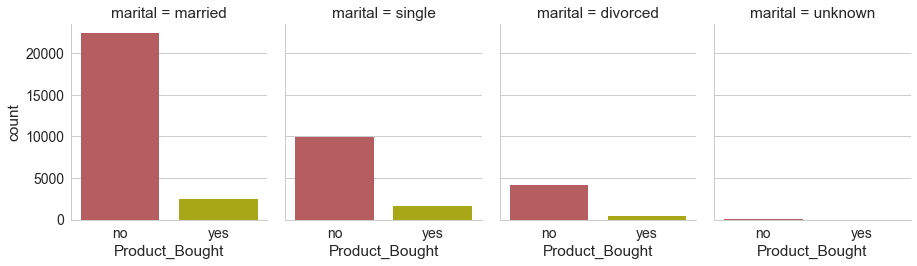

In [74]:
# Lets check for Marital Status

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col="marital",
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C2", "y"])

plt.show()

- So whose marital status is unknown hasn't bought any product

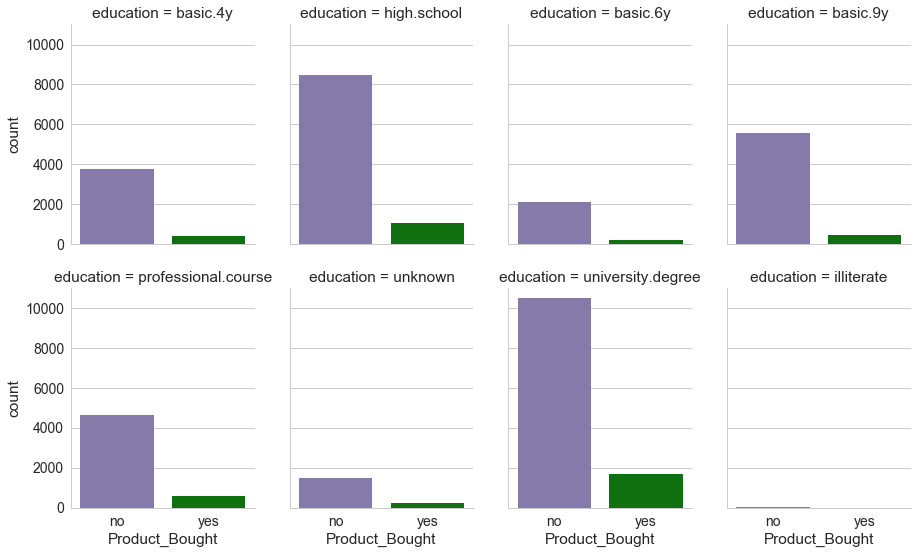

In [75]:
# Lets check for Education

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col='education',col_wrap=4,
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C3", "g"])

plt.show()

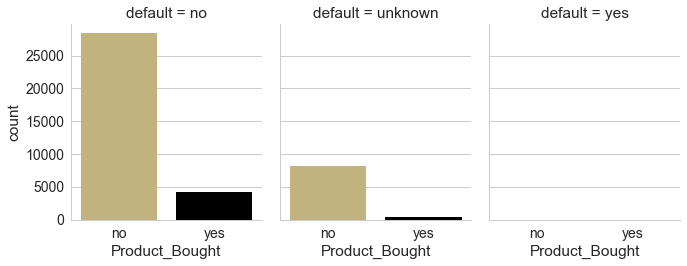

Percentage of conversion when a customers credit risk default is unknown: 
no     94.84704
yes     5.15296
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion when a customer is not a credit risk default: 
no     87.121026
yes    12.878974
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion when a customer is a credit risk default: 
no    100.0
Name: Product_Bought, dtype: float64
------
------


In [76]:
# Lets check for default

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col="default",
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C4", "0"])

plt.show()

print('Percentage of conversion when a customers credit risk default is unknown: ')
print(bank[bank['default']=='unknown']['Product_Bought'].value_counts() / len(bank[bank['default']=='unknown'])*100)
print('------')
print('------')
print('Percentage of conversion when a customer is not a credit risk default: ')
print(bank[bank['default']=='no']['Product_Bought'].value_counts() / len(bank[bank['default']=='no'])*100)
print('------')
print('------')
print('Percentage of conversion when a customer is a credit risk default: ')
print(bank[bank['default']=='yes']['Product_Bought'].value_counts() / len(bank[bank['default']=='yes'])*100)
print('------')
print('------')

- Oh Great, a person who is a default hasn't bought any product

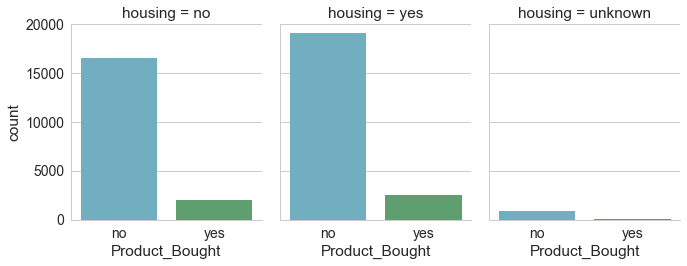

Percentage of conversion when a customer has housing loan: 
no     88.380608
yes    11.619392
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion when a customer does not have a housing loan: 
no     89.120395
yes    10.879605
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion when a customers housing loan status is unknown: 
no     89.191919
yes    10.808081
Name: Product_Bought, dtype: float64
------
------


In [77]:
# Lets check for Housing Loan

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col="housing",
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C5", "C1"])

plt.show()

print('Percentage of conversion when a customer has housing loan: ')
print(bank[bank['housing']=='yes']['Product_Bought'].value_counts() / len(bank[bank['housing']=='yes'])*100)
print('------')
print('------')
print('Percentage of conversion when a customer does not have a housing loan: ')
print(bank[bank['housing']=='no']['Product_Bought'].value_counts() / len(bank[bank['housing']=='no'])*100)
print('------')
print('------')
print('Percentage of conversion when a customers housing loan status is unknown: ')
print(bank[bank['housing']=='unknown']['Product_Bought'].value_counts() / len(bank[bank['housing']=='unknown'])*100)
print('------')
print('------')

- It's somewhat equal, can't differentiate much

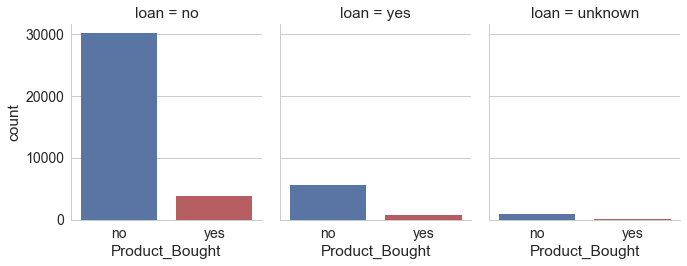

Percentage of conversion when a customer has loan: 
no     89.068502
yes    10.931498
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion when a customer does not have loan: 
no     88.659794
yes    11.340206
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion when a customers loan status is unknown : 
no     89.191919
yes    10.808081
Name: Product_Bought, dtype: float64
------
------


In [78]:
# Lets check for who has Loan

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col="loan",
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C6", "C2"])

plt.show()

print('Percentage of conversion when a customer has loan: ')
print(bank[bank['loan']=='yes']['Product_Bought'].value_counts() / len(bank[bank['loan']=='yes'])*100)
print('------')
print('------')
print('Percentage of conversion when a customer does not have loan: ')
print(bank[bank['loan']=='no']['Product_Bought'].value_counts() / len(bank[bank['loan']=='no'])*100)
print('------')
print('------')
print('Percentage of conversion when a customers loan status is unknown : ')
print(bank[bank['loan']=='unknown']['Product_Bought'].value_counts() / len(bank[bank['loan']=='unknown'])*100)
print('------')
print('------')

- Those who have loan, even after calling them a lot less number of people buy our product

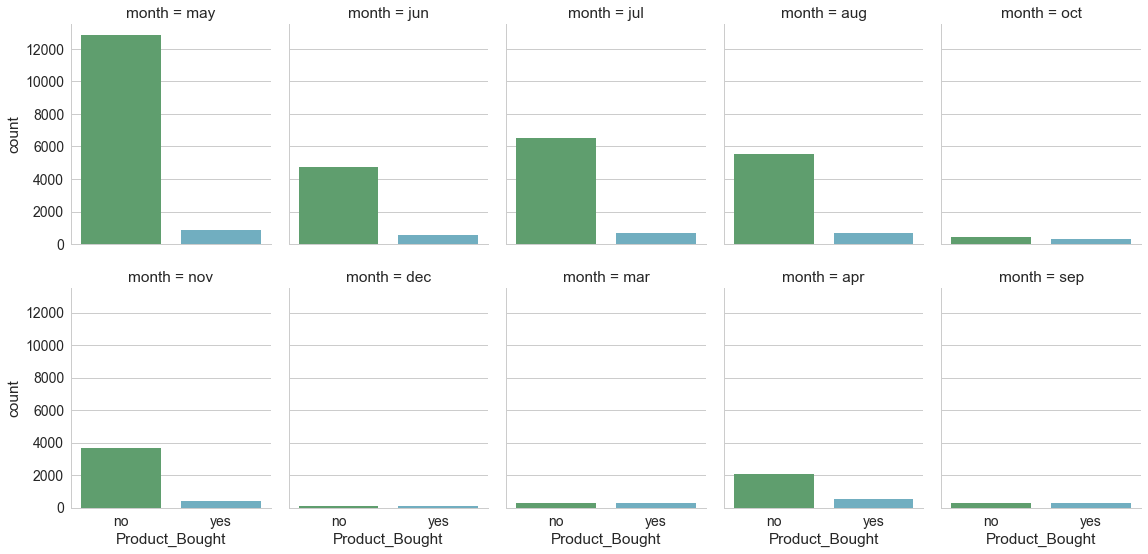

Percentage of conversion in March: 
yes    50.549451
no     49.450549
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion in April: 
no     79.521277
yes    20.478723
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion in May: 
no     93.565255
yes     6.434745
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion in June: 
no     89.48853
yes    10.51147
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion in July: 
no     90.953443
yes     9.046557
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion in August: 
no     89.397863
yes    10.602137
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion in September: 
no     55.087719
yes    44.912281
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion in October: 
no     56.128134
yes    43.871866
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion in Nov

In [79]:
# Lets check In which month peole Bought our products

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col='month',col_wrap=5,
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C7", "C5"])

plt.show()

print('Percentage of conversion in March: ')
print(bank[bank['month']=='mar']['Product_Bought'].value_counts() / len(bank[bank['month']=='mar'])*100)
print('------')
print('------')
print('Percentage of conversion in April: ')
print(bank[bank['month']=='apr']['Product_Bought'].value_counts() / len(bank[bank['month']=='apr'])*100)
print('------')
print('------')
print('Percentage of conversion in May: ')
print(bank[bank['month']=='may']['Product_Bought'].value_counts() / len(bank[bank['month']=='may'])*100)
print('------')
print('------')
print('Percentage of conversion in June: ')
print(bank[bank['month']=='jun']['Product_Bought'].value_counts() / len(bank[bank['month']=='jun'])*100)
print('------')
print('------')
print('Percentage of conversion in July: ')
print(bank[bank['month']=='jul']['Product_Bought'].value_counts() / len(bank[bank['month']=='jul'])*100)
print('------')
print('------')
print('Percentage of conversion in August: ')
print(bank[bank['month']=='aug']['Product_Bought'].value_counts() / len(bank[bank['month']=='aug'])*100)
print('------')
print('------')
print('Percentage of conversion in September: ')
print(bank[bank['month']=='sep']['Product_Bought'].value_counts() / len(bank[bank['month']=='sep'])*100)
print('------')
print('------')
print('Percentage of conversion in October: ')
print(bank[bank['month']=='oct']['Product_Bought'].value_counts() / len(bank[bank['month']=='oct'])*100)
print('------')
print('------')
print('Percentage of conversion in November: ')
print(bank[bank['month']=='nov']['Product_Bought'].value_counts() / len(bank[bank['month']=='nov'])*100)
print('------')
print('------')
print('Percentage of conversion in December: ')
print(bank[bank['month']=='dec']['Product_Bought'].value_counts() / len(bank[bank['month']=='dec'])*100)
print('------')
print('------')

### With the above graph and conversion % we can say :
- Increasing our Marketing cost in the the month of May , June, July , August we are not generating more sales , especially in the month of may
- Whereas in the month of March, April , September, October and December , we are Marketing less but we are getting a good amount of sales

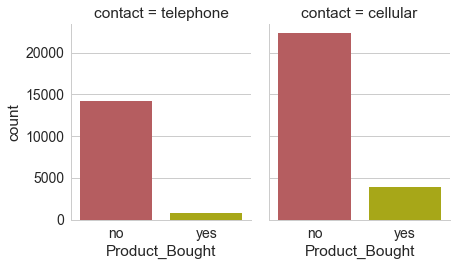

Percentage of conversion of Cellular Calling: 
no     85.262393
yes    14.737607
Name: Product_Bought, dtype: float64
------
------
Percentage of conversion of Telephone Calling: 
no     94.768679
yes     5.231321
Name: Product_Bought, dtype: float64


In [80]:
# Lets check for contact type

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col='contact',
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C8", "y"])

plt.show()

bank_cellular = bank[bank['contact']=='cellular']
bank_telephone = bank[bank['contact']=='telephone']

print('Percentage of conversion of Cellular Calling: ')
print(bank_cellular['Product_Bought'].value_counts() / len(bank_cellular)*100)
print('------')
print('------')
print('Percentage of conversion of Telephone Calling: ')
print(bank_telephone['Product_Bought'].value_counts() / len(bank_telephone)*100)

- So calling on cellphone has an increased amount of conversion rate than on telephone

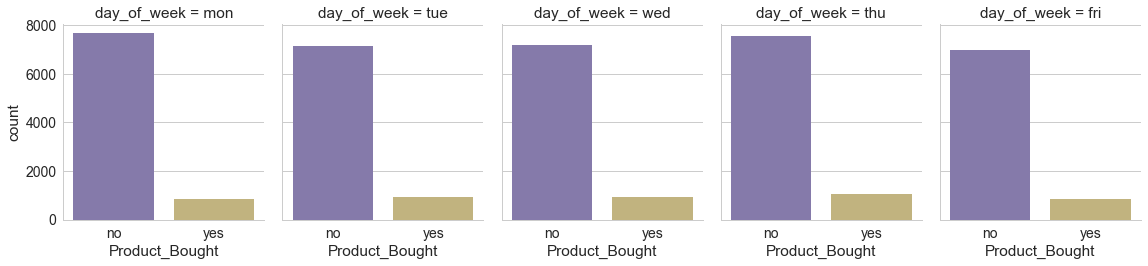

In [81]:
# Lets check In which day of the week we sell more of our products

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col='day_of_week',
                 data=bank,
                 kind="count", aspect=.8 ,palette=["C9", "C4"])

plt.show()

- Almost everyday our selling ratio is equal

### Various insights that we got uptill now 
- Since 
    - Housemaid customers are giving us less no of sales
    - Contact Customers whose marital status we dont know again provides us no sales
    - Illiterate customers also din't buy our product
    - Customers who is a default in credit risk again has 0 % of sales
    - We will have to find a new medium for contacting those customers or we will have to plan a new stratergy to pull these customers interest into buying our product
- As Contacting customers in the month of may  are giving us low sales, we will have to plan our stratergy for that as well

### Lets dig some more into the data with other attributes

In [82]:
# Let us check the duration column which is in seconds

bank['duration'].head()

0    261
1    149
2    226
3    151
4    307
Name: duration, dtype: int64

In [83]:
# Lets convert this seconds column into minutes

bank['duration_minutes'] = bank['duration'] / 60

In [84]:
bank['duration_minutes'].head()

0    4.350000
1    2.483333
2    3.766667
3    2.516667
4    5.116667
Name: duration_minutes, dtype: float64

In [85]:
bank['duration_minutes'].max()

81.96666666666667

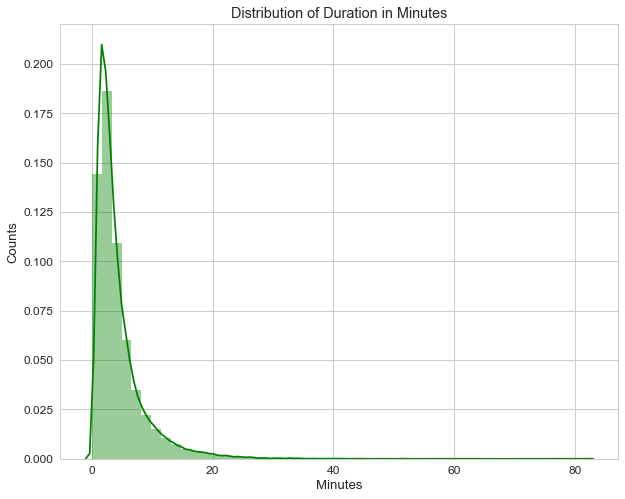

In [86]:
# Lets check the distribution of duration_minutes column

fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')


sns.distplot(bank['duration_minutes'] , color='green')
plt.xlabel('Minutes')
plt.ylabel('Counts')
plt.title('Distribution of Duration in Minutes')
plt.show()

- So our data is right skewed, fair enough

In [87]:
discrete_minutes = [math.ceil(i) for i in bank['duration_minutes']]

In [88]:
bank['duration_discrete_minutes'] = discrete_minutes

In [89]:
### Lets see our campaign column

bank['campaign'].unique()

# So this column gives us how many times a customer was contacted in the campaign
# This will tend to be a useful column, lets move ahead to check if we find something else

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [90]:
# Lets check on to pdays columns

bank['pdays'].unique()

# So this column gives us the difference in days a person was last contacted ( including previous campaign )
# 999 shows the person was not contacted in previous campaign

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [91]:
# Lets check how many people who were contacted for the first time in this campaign actually bought our product

bank_999 = bank[bank['pdays'] == 999]

In [92]:
bank_999.shape

# So we have maximum no of new customers

(39673, 23)

In [93]:
bank_999['Product_Bought'].value_counts() / len(bank_999) * 100

no     90.741814
yes     9.258186
Name: Product_Bought, dtype: float64

In [94]:
# Lets check how many old customers bought our prdduct

bank_old = bank[bank['pdays'] != 999]

In [95]:
bank_old.shape

(1515, 23)

In [96]:
bank_old['Product_Bought'].value_counts() / len(bank_old) * 100

yes    63.828383
no     36.171617
Name: Product_Bought, dtype: float64

- WOAH! So maximum number of our old customers have bought the product, This is interesting
- This means we can contact our old customers as well if we want to do another campaign for a new product

In [97]:
# Lets dig some more into our old customers to see what we get

bank_old_yes = bank_old[bank_old['Product_Bought'] == 'yes']
bank_old_no = bank_old[bank_old['Product_Bought'] == 'no']

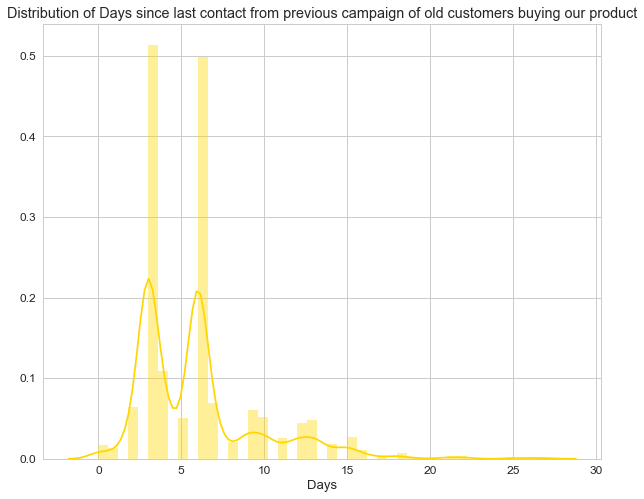

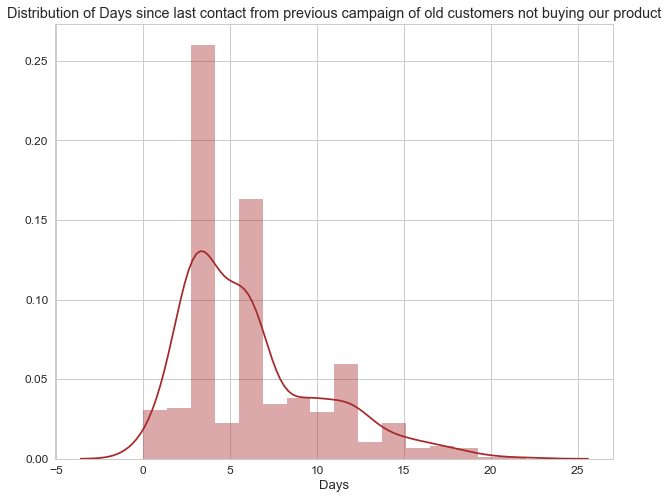

In [98]:
# Lets check the distribution of our days with old customers buying our product

fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.distplot(bank_old_yes['pdays'], color ='gold')
plt.xlabel('Days')
plt.title('Distribution of Days since last contact from previous campaign of old customers buying our product')
plt.show()

# Lets check the distribution of our days with old customers not buying our product

fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.distplot(bank_old_no['pdays'], color ='brown')
plt.xlabel('Days')
plt.title('Distribution of Days since last contact from previous campaign of old customers not buying our product')
plt.show()

- So we can say if we contact our old customers after 20 days approximately , he/she will tend to buy our product

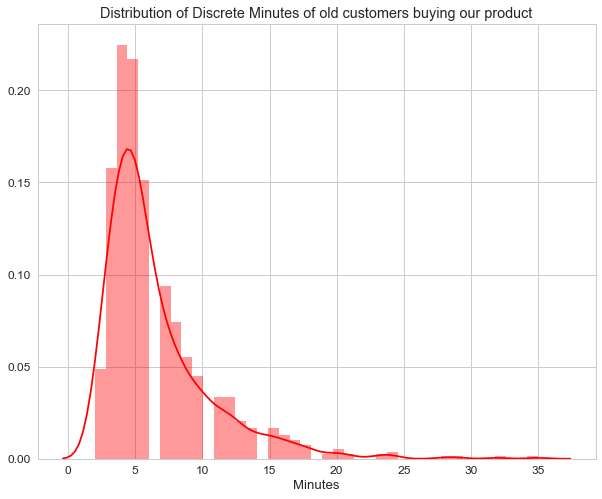

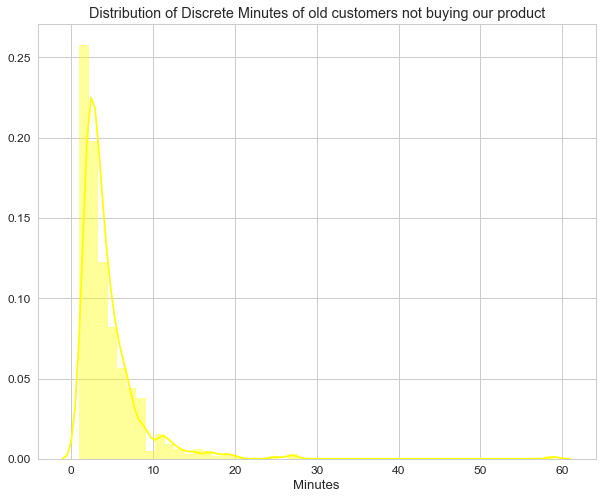

In [99]:
# Lets check the distribution of our time with old customers buying our product

fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.distplot(bank_old_yes['duration_discrete_minutes'], color ='red')
plt.xlabel('Minutes')
plt.title('Distribution of Discrete Minutes of old customers buying our product')
plt.show()

# Lets check the distribution of our time with old customers not buying our product

fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.distplot(bank_old_no['duration_discrete_minutes'], color ='yellow')
plt.xlabel('Minutes')
plt.title('Distribution of Discrete Minutes of old customers not buying our product')
plt.show()

- This shows if we engage with our customers in the communication for more than 3 minutes to less than 15 minutes , our old customer will definitely buy our product
- We can see if our old customers interact for less than 2-3 minutes , he/she will not buy our product

In [100]:
### Hush! till now we got few good insight from our old clients , Lets get back to our new customers

bank_999.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Product_Bought,duration_minutes,duration_discrete_minutes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.350000,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.483333,3
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.766667,4
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.516667,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.116667,6


In [101]:
bank_999['Product_Bought'] = np.where(bank_999['Product_Bought']=='yes',1,0)

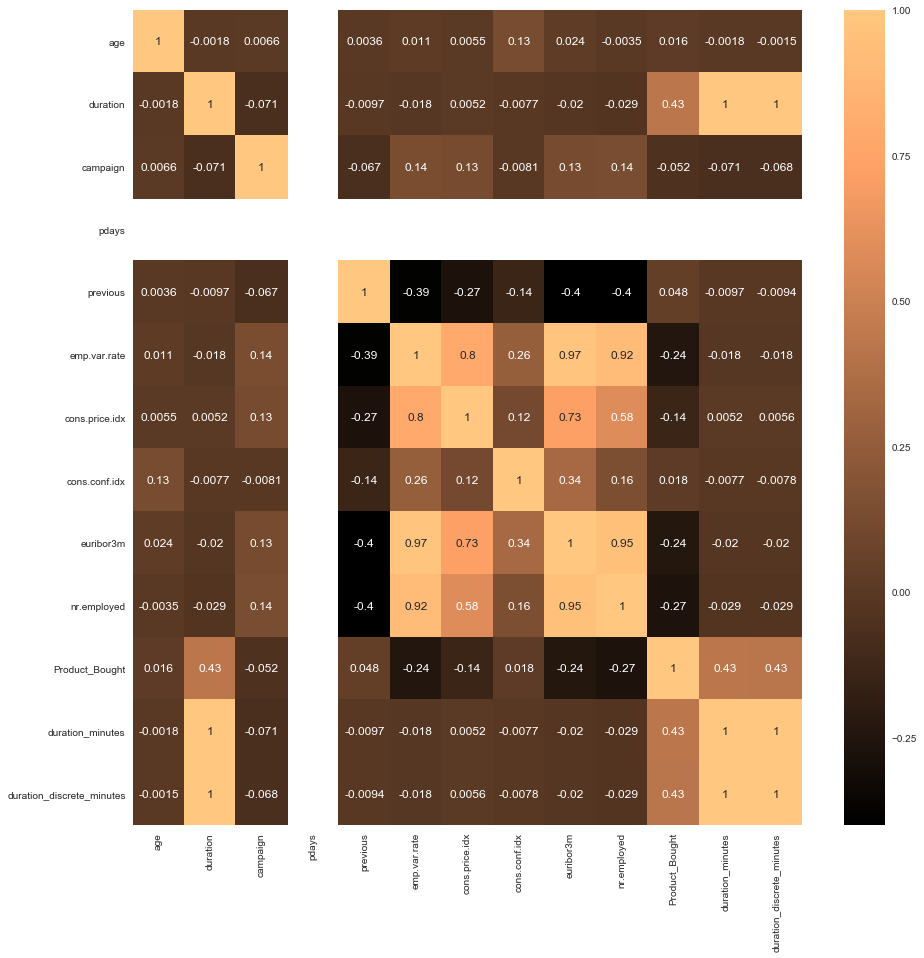

In [102]:
# Lets check with some correlation matrix of how columns are correlated to or target column

fig = plt.figure(figsize=(15,15))
sns.set(font_scale=1.0)
sns.set_style('whitegrid')

bank_999_corr = bank_999.corr()

sns.heatmap(bank_999_corr,cmap = 'copper' , annot = True )
plt.show()

# As the column is not of much importanc to us now because it only contains 999 values , lets drop it

- We see some excellent correlation between the following columns :
    - emp.var.rate
    - cons.price.idx
    - cons.conf.index
    - euribor3m
    - nr.employed
    
- We'll get back to this later, Till then lets check with the minutes column to find some interesting pattern

In [103]:
bank_999 = bank_999.drop('pdays', axis = 1)

In [104]:
# Lets make two subsets as to check some pattern with the minutes columns

bank_999_yes = bank_999[bank_999['Product_Bought'] == 1]
bank_999_no = bank_999[bank_999['Product_Bought'] == 0]

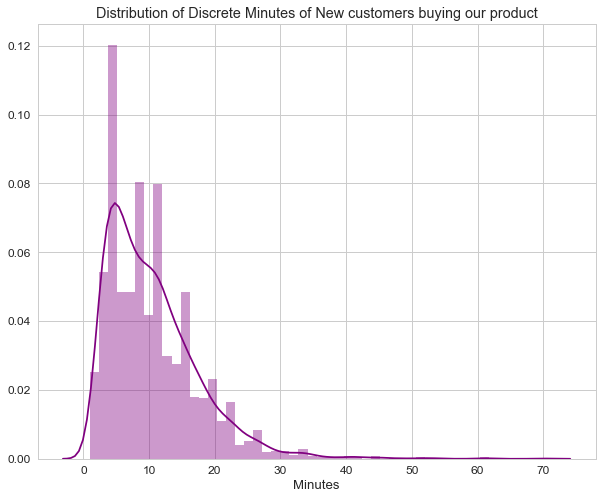

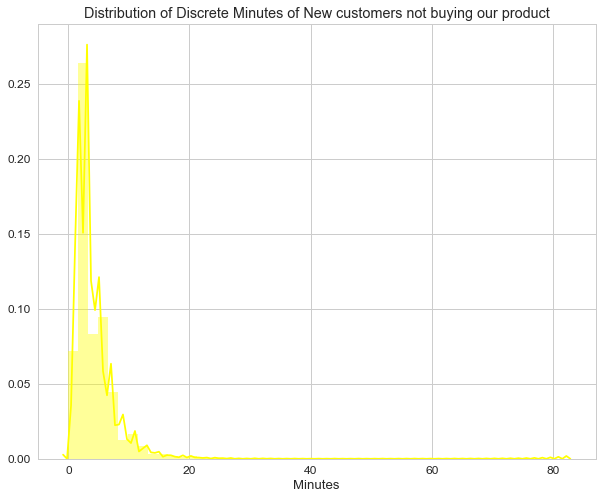

In [105]:
# Lets check the distribution of our time with new customers buying our product

fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.distplot(bank_999_yes['duration_discrete_minutes'], color ='purple')
plt.xlabel('Minutes')
plt.title('Distribution of Discrete Minutes of New customers buying our product')
plt.show()

# Lets check the distribution of our time with new customers not buying our product

fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

sns.distplot(bank_999_no['duration_discrete_minutes'], color ='yellow')
plt.xlabel('Minutes')
plt.title('Distribution of Discrete Minutes of New customers not buying our product')
plt.show()

- We can have a sense now that if our new customers cut the call in less than 3 minutes they generally won't buy our product.
- So if we try to engage our new customers for more than 4 minutes into the conversation , we may have a higher probability of that customer buying our product.

In [106]:
bank_999.dtypes

age                            int64
job                           object
marital                       object
education                     object
default                       object
housing                       object
loan                          object
contact                       object
month                         object
day_of_week                   object
duration                       int64
campaign                       int64
previous                       int64
poutcome                      object
emp.var.rate                 float64
cons.price.idx               float64
cons.conf.idx                float64
euribor3m                    float64
nr.employed                  float64
Product_Bought                 int32
duration_minutes             float64
duration_discrete_minutes      int64
dtype: object

In [107]:
# Lets check poutcome colum 

# Lets calculate some percentage on the customers who bought our product

bank_999_yes['poutcome'].value_counts() / len(bank_999_yes) * 100

nonexistent    85.515927
failure        14.484073
Name: poutcome, dtype: float64

In [108]:
# Lets check previous and poutcome colum 

# Lets calculate some percentage on the customers who bought our product who was contacted previosuly

bank_999_yes['previous'].value_counts() / len(bank_999_yes) * 100

0    85.515927
1    12.278791
2     1.878573
3     0.245031
4     0.081677
Name: previous, dtype: float64

- This shows the failure of 14% that we had in the previous campaign, 12% of those customers bought our product, this is a huge success.

In [109]:
# Lets check poutcome colum 

# Lets calculate some percentage on the customers who bought our product

bank_999_no['poutcome'].value_counts() / len(bank_999_no) * 100

nonexistent    90.061111
failure         9.938889
Name: poutcome, dtype: float64

In [110]:
# Lets calculate some percentage on the customers who dint buy our product who was contacted previosuly

bank_999_no['previous'].value_counts() / len(bank_999_no) * 100

0    90.061111
1     9.013889
2     0.777778
3     0.113889
4     0.025000
5     0.005556
6     0.002778
Name: previous, dtype: float64

- What do we understand ?
    - When we contacted our customer just one time before the current campaign, we are getting a little increment in the percentage of conversion
    - We are getting less conversion if we are contacting them continuously since 4-5 campaign, this might be because this product is not what they are looking for, So we'll have to come up with new schemes to gauge their attention in new campaigns as we cannot loose our customers.

In [111]:
# Lets check with the remaining columns of new customers

bank_999['emp.var.rate'].value_counts()

 1.4    16234
-1.8     8731
 1.1     7763
-0.1     3648
-2.9     1431
-3.4      829
-1.7      497
-1.1      404
-3.0      126
-0.2       10
Name: emp.var.rate, dtype: int64

In [112]:
bank_999['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5630
93.444    5175
94.465    4374
93.200    3581
93.075    2391
92.963     643
92.201     623
92.431     372
92.843     278
92.649     246
92.379     211
94.215     206
94.199     198
93.369     178
92.469     165
94.055     147
94.027     144
93.876     128
92.713     126
93.749     126
94.601     122
94.767      84
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [113]:
bank_999['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5630
-36.1    5175
-41.8    4374
-42.0    3581
-47.1    2391
-40.8     643
-31.4     623
-26.9     372
-50.0     278
-30.1     246
-29.8     211
-40.3     206
-37.5     198
-34.8     178
-33.6     165
-39.8     147
-38.3     144
-40.0     128
-33.0     126
-34.6     126
-49.5     122
-50.8      84
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [114]:
bank_999['nr.employed'].value_counts()

5228.1    16234
5099.1     8299
5191.0     7763
5195.8     3648
5076.2     1431
5017.5      829
4991.6      497
5008.7      432
4963.6      404
5023.5      126
5176.3       10
Name: nr.employed, dtype: int64

- None of the above attributes gives any sense if the customer will buy the product or not.

### Here is the Summary of the insights that we got uptill now :
- Since 
    - Housemaid customers are giving us less no. of sales
    - Contact Customers whose marital status we dont know again provides us no sales
    - Illiterate customers also din't buy our product
    - Customers who is a default in credit risk again has 0 % of sales
    - We will have to find a new medium for contacting those customers or we will have to plan a new stratergy to pull these customers interest into buying our product
- As Contacting customers in the month of may  are giving us low sales, we will have to plan our stratergy for that as well

### Regarding our Old customers
- Contacting our old customers as well if we want to do another campaign for a new product
- Also if we contact our old customers after 20 days approximately , he/she will tend to buy our product
- And if we engage with our customers in the communication for more than 3 minutes to less than 15 minutes , our old customer will definitely buy our product

### Regarding New Customers
- If we try to engage our new customers for more than 4 minutes into the conversation , we may have a higher probability of that customer buying our product.
- Coming up with new schemes to gauge their attention in new campaigns.

## Lets try to build a supervised model based on the above observation and see how accurate can our model be.

In [115]:
# Since our first observation states , this type of campaign is not attracting few customer so lets drop them

bank_1 = bank.copy()

bank_1 = bank_1[bank_1['marital'] != 'unknown']
bank_1 = bank_1[bank_1['education'] != 'illiterate']
bank_1 = bank_1[bank_1['default'] != 'yes']
bank_1 = bank_1[bank_1['duration_discrete_minutes'] >= 3]
bank_1['Product_Bought'] = np.where(bank_1['Product_Bought'] == 'yes' , 1 ,0)

In [116]:
bank_1['Product_Bought'].value_counts() / len(bank_1) * 100

0    84.189247
1    15.810753
Name: Product_Bought, dtype: float64

In [117]:
df_train_y = bank_1['Product_Bought']
df_train_x = bank_1.drop('Product_Bought', axis = 1)

df_train_x_dummies = pd.get_dummies(df_train_x)

train_x, test_x, train_y, test_y = train_test_split(df_train_x_dummies , df_train_y ,
                                                   test_size = 0.3,
                                                   random_state = 100)

print(train_x.shape , test_x.shape,train_y.shape,test_y.shape)

(19737, 62) (8459, 62) (19737,) (8459,)


In [118]:
train_x, test_x, train_y, test_y = train_test_split(df_train_x_dummies , df_train_y ,
                                                   test_size = 0.3,
                                                   random_state = 100)

print(train_x.shape , test_x.shape,train_y.shape,test_y.shape)

(19737, 62) (8459, 62) (19737,) (8459,)


In [119]:
train_y.value_counts() / len(train_y) * 100

0    84.268126
1    15.731874
Name: Product_Bought, dtype: float64

- So we have an imbalanced class here, let's see what we can do later

In [120]:
# Lets run our first model

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(train_x,train_y)

rf_pred = rf_model.predict(test_x)


print('Accuracy : ', accuracy_score(test_y, rf_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, rf_pred))

# Since it is an imbalanced class we will go for F1 score as our Performance Metric

Accuracy :  87.09067265634236
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7106
           1       0.64      0.43      0.52      1353

   micro avg       0.87      0.87      0.87      8459
   macro avg       0.77      0.69      0.72      8459
weighted avg       0.86      0.87      0.86      8459



In [121]:
# Lets run our Second model

ad_model = AdaBoostClassifier()
ad_model.fit(train_x,train_y)

ad_pred = ad_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, ad_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, ad_pred))

Accuracy :  87.55172006147298
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7106
           1       0.69      0.41      0.51      1353

   micro avg       0.88      0.88      0.88      8459
   macro avg       0.79      0.69      0.72      8459
weighted avg       0.86      0.88      0.86      8459



In [122]:
# Lets run our Third model

lg_model = LogisticRegression()
lg_model.fit(train_x,train_y)

lg_pred = lg_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, lg_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, lg_pred))

Accuracy :  87.69358080151318
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7106
           1       0.69      0.43      0.53      1353

   micro avg       0.88      0.88      0.88      8459
   macro avg       0.79      0.69      0.73      8459
weighted avg       0.86      0.88      0.86      8459



In [123]:
# Lets run our Fourth model

xgb_model = XGBClassifier()
xgb_model.fit(train_x,train_y)

xgb_pred = xgb_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, xgb_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, xgb_pred))

Accuracy :  88.21373684832723
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7106
           1       0.67      0.52      0.59      1353

   micro avg       0.88      0.88      0.88      8459
   macro avg       0.79      0.74      0.76      8459
weighted avg       0.87      0.88      0.88      8459



In [124]:
# Lets run our Fourth model while tuning some parameters

xgb_model = XGBClassifier(base_score=0.4, scale_pos_weight=2,n_estimators=150)
xgb_model.fit(train_x,train_y)

xgb_pred = xgb_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, xgb_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, xgb_pred))

# Here we have an increase in the F1 score for class 1, pretty good

Accuracy :  88.04823265161367
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7106
           1       0.60      0.75      0.67      1353

   micro avg       0.88      0.88      0.88      8459
   macro avg       0.78      0.83      0.80      8459
weighted avg       0.89      0.88      0.89      8459



- Since we have imbalanced class here, let's play with some oversampling Technique to overcome the imbalanced nature.

In [125]:
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier , BalancedBaggingClassifier

In [126]:
os = SMOTE(random_state=0)

os_data_x,os_data_y=os.fit_sample(train_x,train_y)
os_data_x = pd.DataFrame(data=os_data_x,columns=train_x.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Product_Bought"])

In [127]:
os_data_x.shape , os_data_y.shape

((33264, 62), (33264, 1))

In [128]:
# Lets again run our model to see if we get some good results

xgb_model = XGBClassifier(base_score=0.5, scale_pos_weight=1,n_estimators=80)
xgb_model.fit(os_data_x,os_data_y)

xgb_pred = xgb_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, xgb_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, xgb_pred))

# Here we dont get much increase in the F1 Score

Accuracy :  87.76451117153327
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7106
           1       0.62      0.62      0.62      1353

   micro avg       0.88      0.88      0.88      8459
   macro avg       0.77      0.77      0.77      8459
weighted avg       0.88      0.88      0.88      8459



In [129]:
# Lets again run our model using Balanced Classifiers to check some results

brf_model = BalancedRandomForestClassifier(n_estimators=200 , criterion = 'gini',bootstrap=True,class_weight='balanced')
brf_model.fit(os_data_x,os_data_y)

brf_pred = brf_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, brf_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, brf_pred))

# Here we have an increase in the F1 score for class 1, pretty good

Accuracy :  87.78815462820664
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7106
           1       0.62      0.60      0.61      1353

   micro avg       0.88      0.88      0.88      8459
   macro avg       0.77      0.77      0.77      8459
weighted avg       0.88      0.88      0.88      8459



In [130]:
# Lets again run our model using Balanced Classifiers to check some results

bbc_model = BalancedBaggingClassifier(base_estimator=AdaBoostClassifier(), n_estimators=50)
bbc_model.fit(os_data_x,os_data_y)

bbc_pred = bbc_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, bbc_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, bbc_pred))

Accuracy :  86.7833077195886
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7106
           1       0.62      0.46      0.53      1353

   micro avg       0.87      0.87      0.87      8459
   macro avg       0.76      0.70      0.72      8459
weighted avg       0.86      0.87      0.86      8459



- With all the models we say, XGBoostClassifier is giving us Better F1 Score, so XGB will serve better for our problem

### Since our *DURATION OF CALL* attributes are highly correlated if the client will buy our product or not, let's drop it and check how our model performs then

In [131]:
bank_2 = bank.copy()

bank_2 = bank_2.drop(['duration','duration_minutes','duration_discrete_minutes'],axis = 1)
bank_2['Product_Bought'] = np.where(bank_2['Product_Bought'] == 'yes' , 1 ,0)

In [132]:
bank_2['Product_Bought'].value_counts() / len(bank_2) * 100

0    88.734583
1    11.265417
Name: Product_Bought, dtype: float64

In [133]:
df_train_y = bank_2['Product_Bought']
df_train_x = bank_2.drop('Product_Bought', axis = 1)

df_train_x_dummies = pd.get_dummies(df_train_x)

train_x, test_x, train_y, test_y = train_test_split(df_train_x_dummies , df_train_y ,
                                                   test_size = 0.3,
                                                   random_state = 100)

print(train_x.shape , test_x.shape,train_y.shape,test_y.shape)

(28831, 62) (12357, 62) (28831,) (12357,)


In [134]:
train_x, test_x, train_y, test_y = train_test_split(df_train_x_dummies , df_train_y ,
                                                   test_size = 0.3,
                                                   random_state = 100)

print(train_x.shape , test_x.shape,train_y.shape,test_y.shape)

(28831, 62) (12357, 62) (28831,) (12357,)


In [135]:
# Lets run our first model

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(train_x,train_y)

rf_pred = rf_model.predict(test_x)


print('Accuracy : ', accuracy_score(test_y, rf_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, rf_pred))

Accuracy :  88.88888888888889
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10975
           1       0.51      0.25      0.34      1382

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.71      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357



In [136]:
# Lets run our Second model

ad_model = AdaBoostClassifier()
ad_model.fit(train_x,train_y)

ad_pred = ad_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, ad_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, ad_pred))

Accuracy :  90.09468317552805
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10975
           1       0.68      0.22      0.33      1382

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [137]:
# Lets run our Third model

lg_model = LogisticRegression()
lg_model.fit(train_x,train_y)

lg_pred = lg_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, lg_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, lg_pred))

Accuracy :  89.9975722262685
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10975
           1       0.67      0.21      0.32      1382

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357



In [138]:
# Lets run our Fourth model

xgb_model = XGBClassifier()
xgb_model.fit(train_x,train_y)

xgb_pred = xgb_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, xgb_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, xgb_pred))

Accuracy :  90.15942380836772
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10975
           1       0.68      0.23      0.34      1382

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.79      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



In [139]:
# Lets run our Fourth model while tuning some parameters

xgb_model = XGBClassifier(base_score=0.4, scale_pos_weight=2,n_estimators=150)
xgb_model.fit(train_x,train_y)

xgb_pred = xgb_model.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, xgb_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, xgb_pred))

# Here we have an increase in the F1 score for class 1, pretty good

Accuracy :  89.11548110382779
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10975
           1       0.52      0.44      0.48      1382

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.72      0.69      0.71     12357
weighted avg       0.88      0.89      0.89     12357



- Again Since we have imbalanced class here, let's play with some oversampling Technique to overcome the imbalanced nature.

In [140]:
# We will SMOTE ( Synthetic Minority Over-Sampling Technique ) to handle our imbalanced class

os = SMOTE(random_state=0)

os_data_x,os_data_y=os.fit_sample(train_x,train_y)
os_data_x = pd.DataFrame(data=os_data_x,columns=train_x.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Product_Bought"])

In [141]:
os_data_x.shape , os_data_y.shape

((51146, 62), (51146, 1))

In [142]:
# Lets again run our model to see if we get some good results

xgb_model_bal = XGBClassifier(base_score=0.5, scale_pos_weight=1,n_estimators=80)
xgb_model_bal.fit(os_data_x,os_data_y)

xgb_pred = xgb_model_bal.predict(test_x)

print('Accuracy : ', accuracy_score(test_y, xgb_pred) * 100)
print("-----------")
print('Classification Report')
print(classification_report(test_y, xgb_pred))

# Also here we dont get much increase in the F1 Score.

Accuracy :  88.89698146799385
-----------
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10975
           1       0.50      0.39      0.44      1382

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.71      0.67      0.69     12357
weighted avg       0.88      0.89      0.88     12357



In [143]:
# Let us check which features are contributing much in the prediction, and can we play around with the useful features.
# Since XGBClassifier gave us better results before using synthetic oversampling, we will check which features are playing 
# an important role

xgb_feature_importances = pd.DataFrame(xgb_model.feature_importances_, index= train_x.columns , columns = ['importances'])
xgb_feature_importances = xgb_feature_importances.sort_values('importances' , ascending=False)
xgb_feature_importances

,importances
euribor3m,0.211100
age,0.139742
campaign,0.083251
cons.conf.idx,0.066402
nr.employed,0.037661
cons.price.idx,0.036670
contact_cellular,0.032706
day_of_week_mon,0.031715
pdays,0.030723
poutcome_failure,0.028741


- Okay with this we can say that euribor3m column and age column are contributing very much for our prediction
- Next is campaign and cons.conf.indx , we'll check if we can do some feature engineering on that part

In [144]:
bank_2[bank_2['Product_Bought']==1]['euribor3m'].value_counts() / len(bank_2[bank_2['Product_Bought']==1]) * 100

4.962    3.103448
1.365    2.931034
1.405    2.909483
4.963    2.715517
1.266    2.241379
1.260    2.198276
4.961    1.939655
0.715    1.831897
0.879    1.810345
0.714    1.573276
4.857    1.551724
4.965    1.379310
1.281    1.357759
1.250    1.293103
4.968    1.228448
1.354    1.228448
4.960    1.228448
4.964    1.185345
4.864    1.142241
4.957    1.142241
0.884    1.077586
1.262    1.077586
4.076    1.077586
4.966    1.034483
0.720    1.012931
4.120    0.926724
1.291    0.883621
1.268    0.862069
4.860    0.818966
0.883    0.818966
           ...   
4.406    0.043103
0.732    0.043103
0.750    0.043103
1.224    0.043103
1.030    0.043103
4.592    0.043103
0.713    0.043103
4.343    0.043103
0.690    0.043103
1.778    0.043103
4.918    0.043103
1.584    0.043103
4.474    0.043103
0.993    0.043103
1.007    0.043103
0.933    0.021552
0.711    0.021552
0.895    0.021552
1.629    0.021552
0.771    0.021552
0.766    0.021552
0.944    0.021552
0.749    0.021552
0.700    0.021552
0.752    0

- We see a good no of sales if our eurobor 3 month rate is above 4.8. Let's check if its true

In [145]:
bank_2[bank_2['euribor3m']>4.8]['Product_Bought'].value_counts() / len(bank_2[bank_2['euribor3m']>4.8]) * 100

0    95.252744
1     4.747256
Name: Product_Bought, dtype: float64

In [146]:
bank_2[bank_2['euribor3m']>4.9]['Product_Bought'].value_counts() / len(bank_2[bank_2['euribor3m']>4.9]) * 100

0    94.419568
1     5.580432
Name: Product_Bought, dtype: float64

- Here we see if our euribor 3 month rate is more than 4.9 our sale has increased by almost 1 %

In [147]:
# Lets check with age colum

print('The % of conversion when we target with people of Age >20 :')
print(bank_2[bank_2['age']>20]['Product_Bought'].value_counts() / len(bank_2[bank_2['age']>20]) * 100)
print('---------')
print('---------')
print('The % of conversion when we target with people of Age >30 :')
print(bank_2[bank_2['age']>30]['Product_Bought'].value_counts() / len(bank_2[bank_2['age']>30]) * 100)
print('---------')
print('---------')
print('The % of conversion when we target with people of Age >40 :')
print(bank_2[bank_2['age']>40]['Product_Bought'].value_counts() / len(bank_2[bank_2['age']>40]) * 100)
print('---------')
print('---------')
print('The % of conversion when we target with people of Age >50 :')
print(bank_2[bank_2['age']>50]['Product_Bought'].value_counts() / len(bank_2[bank_2['age']>50]) * 100)
print('---------')
print('---------')
print('The % of conversion when we target with people of Age >55 :')
print(bank_2[bank_2['age']>55]['Product_Bought'].value_counts() / len(bank_2[bank_2['age']>55]) * 100)
print('---------')
print('---------')
print('The % of conversion when we target with people of Age >60 :')
print(bank_2[bank_2['age']>60]['Product_Bought'].value_counts() / len(bank_2[bank_2['age']>60]) * 100)
print('---------')
print('---------')
print('The % of conversion when we target with people of Age >65 :')
print(bank_2[bank_2['age']>65]['Product_Bought'].value_counts() / len(bank_2[bank_2['age']>65]) * 100)
print('---------')
print('---------')
print('The % of conversion when we target with people of Age >70 :')
print(bank_2[bank_2['age']>70]['Product_Bought'].value_counts() / len(bank_2[bank_2['age']>70]) * 100)
print('---------')
print('---------')

The % of conversion when we target with people of Age >20 :
0    88.835022
1    11.164978
Name: Product_Bought, dtype: float64
---------
---------
The % of conversion when we target with people of Age >30 :
0    89.599172
1    10.400828
Name: Product_Bought, dtype: float64
---------
---------
The % of conversion when we target with people of Age >40 :
0    88.983927
1    11.016073
Name: Product_Bought, dtype: float64
---------
---------
The % of conversion when we target with people of Age >50 :
0    84.930362
1    15.069638
Name: Product_Bought, dtype: float64
---------
---------
The % of conversion when we target with people of Age >55 :
0    79.313233
1    20.686767
Name: Product_Bought, dtype: float64
---------
---------
The % of conversion when we target with people of Age >60 :
0    54.505495
1    45.494505
Name: Product_Bought, dtype: float64
---------
---------
The % of conversion when we target with people of Age >65 :
0    53.150242
1    46.849758
Name: Product_Bought, dtype:

- Here we see if we target our customer with age greater than 50, our sales rate increases with a good amount
- Also we see almost 50% of customers targeted with age above 60 have bought our product
- So we should check more on our seniour customers including middle aged and young customers

In [148]:
# Lets create bins of our age column to visualise better

bank_2['age_bins'] = np.where(bank_2['age'] >20 ,'2 (Btwn 20 & 30)','1 (less than 20)')
bank_2['age_bins'] = np.where(bank_2['age'] >30 ,'3 (Btwn 30 & 40)',bank_2['age_bins'])
bank_2['age_bins'] = np.where(bank_2['age'] >40 ,'4 (Btwn 40 & 50)',bank_2['age_bins'])
bank_2['age_bins'] = np.where(bank_2['age'] >50 ,'5 (Btwn 50 & 60)',bank_2['age_bins'])
bank_2['age_bins'] = np.where(bank_2['age'] >60 ,'6 (Btwn 60 & 70)',bank_2['age_bins'])
bank_2['age_bins'] = np.where(bank_2['age'] >70 ,'7 (Above 70)',bank_2['age_bins'])

In [149]:
bank_2['age_bins'].value_counts()

3 (Btwn 30 & 40)    16385
4 (Btwn 40 & 50)    10240
2 (Btwn 20 & 30)     7243
5 (Btwn 50 & 60)     6270
6 (Btwn 60 & 70)      488
7 (Above 70)          422
1 (less than 20)      140
Name: age_bins, dtype: int64

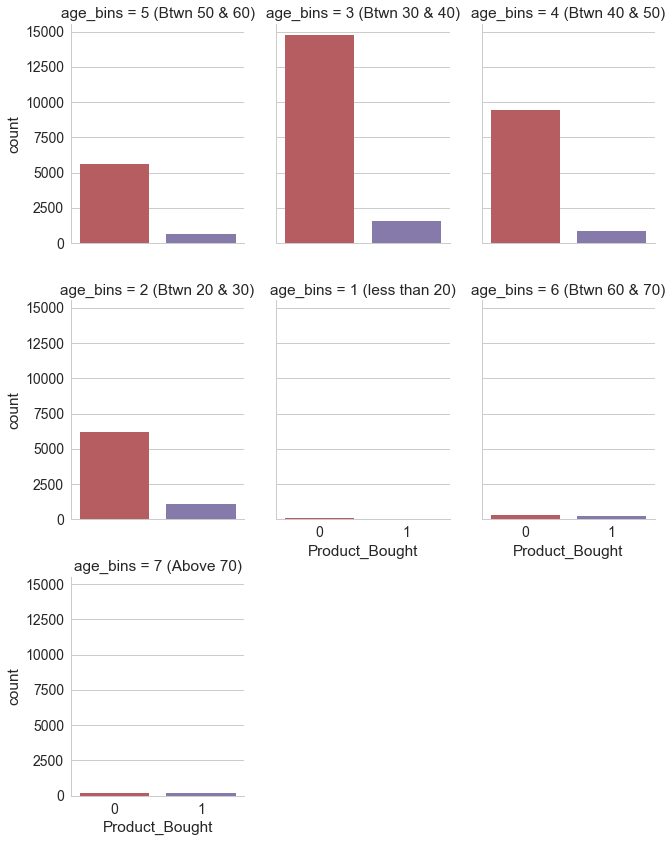

In [150]:
# Lets visualize with Age_Bins Column


sns.set(font_scale=1.4)
sns.set_style('whitegrid')

sns.factorplot("Product_Bought", col='age_bins',col_wrap=3,
                 data=bank_2,
                 kind="count", aspect=.8 ,palette=["C8", "C9"])

plt.tight_layout()
plt.show()

In [151]:
# Since we are targeting customer with age more than 30 & less than 50 , let's see our conversion rate of products sold
# for these age group

print('The Percentage of Products sold with age Between 30 & 50 :')
print(bank_2[(bank_2['age_bins']=='3 (Btwn 30 & 40)') | (bank_2['age_bins']=='4 (Btwn 40 & 50)')]['Product_Bought'].value_counts() / len(bank_2[(bank_2['age_bins']=='3 (Btwn 30 & 40)') | (bank_2['age_bins']=='4 (Btwn 40 & 50)')]) *100)

The Percentage of Products sold with age Between 30 & 50 :
0    90.858216
1     9.141784
Name: Product_Bought, dtype: float64


- This shows a lower ratio of products are being sold in the age group between 30 and 40

In [152]:
# Let the column of consumer price index to see if it holds any good information

bank_2[bank_2['Product_Bought']==1]['cons.price.idx'].value_counts() / len(bank_2[bank_2['Product_Bought']==1]) * 100

92.893    11.293103
93.075     9.525862
93.918     8.771552
93.444     5.840517
92.201     5.689655
92.963     5.689655
93.994     5.172414
93.200     4.094828
94.465     4.051724
92.431     3.879310
94.215     3.793103
92.649     3.620690
93.369     3.232759
94.199     3.232759
92.843     2.715517
93.876     2.629310
94.027     2.586207
94.055     2.306034
92.379     2.284483
93.749     2.090517
94.601     2.004310
92.713     1.896552
92.469     1.422414
94.767     1.250000
93.798     0.905172
92.756     0.021552
Name: cons.price.idx, dtype: float64

In [153]:
print('The Percentage of Products Bought when consumer price index is above 92.5 :')
print(bank_2[bank_2['cons.price.idx']>92.5]['Product_Bought'].value_counts() / len(bank_2[bank_2['cons.price.idx']>92.5]) * 100)
print('-------')
print('-------')
print('The Percentage of Products Bought when consumer price index is above 93 :')
print(bank_2[bank_2['cons.price.idx']>93]['Product_Bought'].value_counts() / len(bank_2[bank_2['cons.price.idx']>93]) * 100)
print('-------')
print('-------')
print('The Percentage of Products Bought when consumer price index is above 93.5 :')
print(bank_2[bank_2['cons.price.idx']>93.5]['Product_Bought'].value_counts() / len(bank_2[bank_2['cons.price.idx']>93.5]) * 100)
print('-------')
print('-------')
print('The Percentage of Products Bought when consumer price index is above 94 :')
print(bank_2[bank_2['cons.price.idx']>94]['Product_Bought'].value_counts() / len(bank_2[bank_2['cons.price.idx']>94]) * 100)
print('-------')
print('-------')
print('The Percentage of Products Bought when consumer price index is above 94.3 :')
print(bank_2[bank_2['cons.price.idx']>94.3]['Product_Bought'].value_counts() / len(bank_2[bank_2['cons.price.idx']>94.3]) * 100)
print('-------')
print('-------')
print('The Percentage of Products Bought when consumer price index is above 94.5 :')
print(bank_2[bank_2['cons.price.idx']>94.5]['Product_Bought'].value_counts() / len(bank_2[bank_2['cons.price.idx']>94.5]) * 100)
print('-------')
print('-------')

The Percentage of Products Bought when consumer price index is above 92.5 :
0    89.819359
1    10.180641
Name: Product_Bought, dtype: float64
-------
-------
The Percentage of Products Bought when consumer price index is above 93 :
0    91.138651
1     8.861349
Name: Product_Bought, dtype: float64
-------
-------
The Percentage of Products Bought when consumer price index is above 93.5 :
0    91.297201
1     8.702799
Name: Product_Bought, dtype: float64
-------
-------
The Percentage of Products Bought when consumer price index is above 94 :
0    84.572812
1    15.427188
Name: Product_Bought, dtype: float64
-------
-------
The Percentage of Products Bought when consumer price index is above 94.3 :
0    92.79643
1     7.20357
Name: Product_Bought, dtype: float64
-------
-------
The Percentage of Products Bought when consumer price index is above 94.5 :
0    54.518072
1    45.481928
Name: Product_Bought, dtype: float64
-------
-------


- Again if we hold a campaign when our consumer price index is above 94.5 , almost 50% of customers have bought our product

In [154]:
# Let's do some LabelEncoding and do a final Modelling before Wrapping it up

lb = LabelEncoder()
bank_3 = bank_2.apply(lambda x : lb.fit_transform(x))

In [155]:
#Let's check our final model with Label Encoding and without Duration Column

df_train_y = bank_3['Product_Bought']
df_train_x = bank_3.drop('Product_Bought' , axis =1)

train_x , test_x ,train_y, test_y = train_test_split(df_train_x, df_train_y , test_size = 0.3,
                                                    random_state = 100)

train_x.shape , test_x.shape , train_y.shape , test_y.shape

((28831, 20), (12357, 20), (28831,), (12357,))

In [156]:
# Building our model

xgb_model = XGBClassifier(learning_rate=0.08 , n_jobs=-1, scale_pos_weight=2 )
xgb_model.fit(train_x,train_y)

xgb_pred = xgb_model.predict(test_x)

scores = cross_val_score(xgb_model, train_x,train_y, cv=5)

print('Accuracy :' , accuracy_score(test_y,xgb_pred)*100)
print('----------')
print('----------')
print('Classification Report :')
print(" ")
print(classification_report(test_y,xgb_pred))
print('----------')
print('----------')
print('Cross Validation Scores are :')
print(" ")
print(scores)

Accuracy : 88.83224083515417
----------
----------
Classification Report :
 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10975
           1       0.50      0.44      0.47      1382

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.72      0.69      0.70     12357
weighted avg       0.88      0.89      0.89     12357

----------
----------
Cross Validation Scores are :
 
[0.89093116 0.88503555 0.89197156 0.88759757 0.8888118 ]


In [157]:
# As our Model is not performing for some assumptions , lets remove then

bank_2 = bank_2[bank_2['marital'] != 'unknown']
bank_2 = bank_2[bank_2['education'] != 'illiterate']
bank_2 = bank_2[bank_2['default'] != 'yes']

lb = LabelEncoder()
bank_3 = bank_2.apply(lambda x : lb.fit_transform(x))

In [158]:
#Let's check the model again with Label Encoding

df_train_y = bank_3['Product_Bought']
df_train_x = bank_3.drop('Product_Bought' , axis =1)

train_x , test_x ,train_y, test_y = train_test_split(df_train_x, df_train_y , test_size = 0.3,
                                                    random_state = 100)

train_x.shape , test_x.shape , train_y.shape , test_y.shape

((28760, 20), (12327, 20), (28760,), (12327,))

In [159]:
# Building our model again

xgb_model = XGBClassifier(learning_rate=0.08 , n_jobs=-1, scale_pos_weight=2 )
xgb_model.fit(train_x,train_y)

xgb_pred = xgb_model.predict(test_x)

scores = cross_val_score(xgb_model, train_x,train_y, cv=5)

print('Accuracy :' , accuracy_score(test_y,xgb_pred)*100)
print('----------')
print('----------')
print('Classification Report :')
print(" ")
print(classification_report(test_y,xgb_pred))
print('----------')
print('----------')
print('Cross Validation Scores are :')
print(" ")
print(scores)

Accuracy : 89.07276709661718
----------
----------
Classification Report :
 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10984
           1       0.50      0.43      0.46      1343

   micro avg       0.89      0.89      0.89     12327
   macro avg       0.71      0.69      0.70     12327
weighted avg       0.88      0.89      0.89     12327

----------
----------
Cross Validation Scores are :
 
[0.89136103 0.88838665 0.89499305 0.88508345 0.88923665]


- So our model is performing well for the above data.

### So even with our model we learn the following cases from our past data and should be implemented in the New campaign to reduce Marketing Cost and Increase Product_Bought Percentage !!
- Call our old Customers after max of 20 days of previous campaign and engage them for more than 3-4 minutes to have an increase in the Y%
- Bring up new schemes along with new product for our very old customers to whom we are contacting for more than 2 campaigns
- While Contacting new customers, engage them for more than 3 minutes , to again have an increase in Y%
- Reduce the Marketing cost Considerably in the month of May, July and rather Focus on March ,June, September , October , December as it shows a good ratio of Product_Bought against Product not Bought
- Finding a way to sell our products to Blue-Collar and Admin Job roles , as they are the one which are giving us lesser conversion Ratio
- With this we can have a tremendous increase in our sales of more than 4-5 % or maybe more, while decreasing our marketing cost to a large extent which we have leared from the pattern.

### Now when we are coming up with new campaign, we dont know for how long a customer can hold on to the call, so the other attributes that we can look upon along with the above data is:
- Contact Maximum customers with age greater than 50 to get higher ratio Products Sold
- Since there is a lower conversion rate of products sold between age group 30-50 , we should follow a different stratergy or bring new products for them, or we should cut down our marketing cost of those age group and focus more with Senior Citizens.
- Also we should contact our customer when consumer price index is greater than 94.5 to lower our Marketing Cost and have a considerable increase in Y%
- Also instead of randomly calling to customer , we can contact Customers who have Bought Our Product in this campaign along with following points :
    - As mentioned contact them after 20 days of this campaign.
    - Contact customers who Use cellular phones
    - Contact age group of people with more than 50 years of age as mentioned above
    - As the next month is May, and with our previous data we dont see much sales in the month of May, we have to be very careful with our Marketing cost and focus on the insight that we have seen above to considerably increase our Y% and minimize our X% (Marketing Cost)

### ** Thank You ** 